# Classical Conditioning

This notebook demonstrates that a variety of classical conditioning resuls such as concurrent conditioning, blocking and associative conditioning can be reproduced with the TD model ([Sutton & Barto 1990[(http://incompleteideas.net/papers/sutton-barto-90.pdf))

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [40]:
def show_trial(states, rewards, state_names):
    f, axs = plt.subplots(2, 1, figsize=(20, 2))

    axs[0].matshow(states[:60].T)
    axs[0].set_yticks([])
    axs[0].text(-1, 0, 'state sequence', ha='right')
    for i, name in enumerate(state_names):
        axs[0].text(60, i, name, ha='left')

    axs[1].matshow(rewards[None, :60])
    #axs[1].set_xlabel('reward')
    axs[1].set_yticks([])
    axs[1].text(-1, 0, 'reward sequence', ha='right')
    axs[1].text(60, 0, 'food', ha='left')

## Forward conditioning

Forward conditioning is the effect that a conditional stimulus becomes associated with a slighlty later appearing unconditional stimulus, and hence the unconditional response.

In [56]:
state_names = ['CS:metronome']
N_states = len(state_names)
representation_size = N_states

In [57]:
def create_training_trial():
    state_representation_sequence = np.zeros((1000, representation_size))
    reward_sequence = np.zeros(100)
    state_representation_sequence[25:50, 0] = 1
    reward_sequence[50] = 1
       
    return state_representation_sequence, reward_sequence

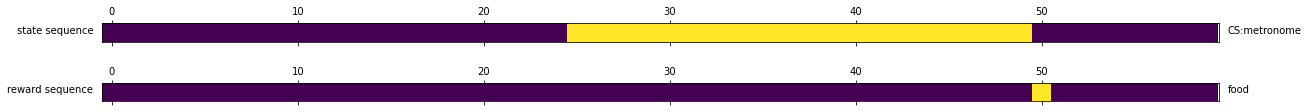

In [58]:
states, rewards = create_training_trial()
show_trial(states, rewards, state_names)

In [59]:
gamma = 0.95
alpha = 0.001
lambda_ = 0.9  # eligibility trace parameter

V = np.zeros(representation_size)
V_history = []

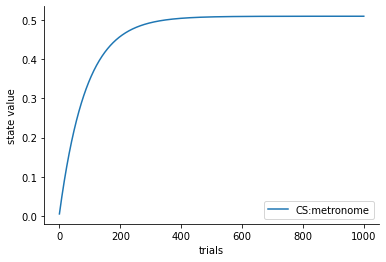

In [60]:
for trial in range(1000):
    last_state = None
    last_reward = None
    z = np.zeros_like(V)  # eligibility trace
    state_values = []
    for state, reward in zip(states, rewards):
        # update eligibility trace
        z = gamma * lambda_ * z + state
        state_values.append(V @ state)

        if last_state is not None:
            # compute TD error
            delta = reward + gamma * V @ state - V @ last_state
            # update value parameter
            V += alpha * delta * z
        
        last_state = state
        last_reward = reward
    V_history.append(V.copy())
    
plt.plot(V_history, label=state_names[0])
plt.legend()
plt.ylabel('state value')
plt.xlabel('trials')
sns.despine()

## Higher Order Conditioning

Higher Order Conditioning is the effect that when we associate one conditional stimulus CSA with another conditional stimulus CSB which as already been associated with some reward -- without showing any reward -- then CSA becomes associated with the reward. Second order conditioning has already been shown by Pavlov and is accounted for by our TD model, as we'll see

In [61]:
state_names = ['CSA:black square', 'CSB: metronome']

N_states = len(state_names)
representation_size = N_states

In [62]:
def create_training_trial_CSB():
    state_representation_sequence = np.zeros((100, representation_size))
    reward_sequence = np.zeros(100)
    state_representation_sequence[25:50, 1] = 1
    
    reward_sequence[49] = 1
    
    return state_representation_sequence, reward_sequence

def create_training_trial_CSA_CSB_no_reward():
    state_representation_sequence = np.zeros((100, representation_size))
    reward_sequence = np.zeros(100)
    state_representation_sequence[0:25, 0] = 1
    state_representation_sequence[25:50, 1] = 1
    
    return state_representation_sequence, reward_sequence

def create_training_trial_CSA():
    state_representation_sequence = np.zeros((100, representation_size))
    reward_sequence = np.zeros(100)
    state_representation_sequence[0:25, 0] = 1
    
    reward_sequence[49] = 1
    
    return state_representation_sequence, reward_sequence

In [63]:
gamma = 0.95
alpha = 0.001
lambda_ = 0.9

N_trials = 200

V = np.zeros(representation_size)
V_history = []

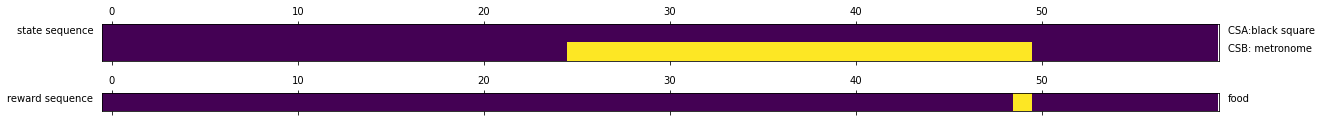

In [64]:
states, rewards = create_training_trial_CSB()

show_trial(states, rewards, state_names)

In [65]:
for trial in range(N_trials):
    last_state = None
    last_reward = None
    z = np.zeros_like(V)  # eligibility trace
    state_values = []
    for state, reward in zip(states, rewards):
        # update eligibility trace
        z = gamma * lambda_ * z + state
        state_values.append(V @ state)

        if last_state is not None:
            # compute TD error
            delta = reward + gamma * V @ state - V @ last_state
            # update value parameter
            V += alpha * delta * z

        last_state = state
        last_reward = reward
    V_history.append(V.copy())

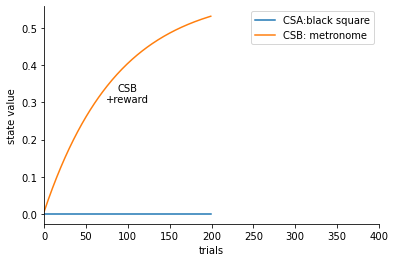

In [66]:
plt.plot(V_history, label=state_names)
plt.xlim(0, 2 * N_trials)
plt.text(0.5 * N_trials, 0.3, 'CSB\n+reward', ha='center')
plt.ylabel('state value')
plt.xlabel('trials')
plt.legend()
sns.despine()

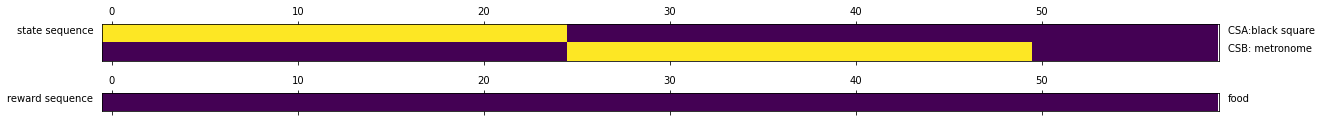

In [67]:
states, rewards = create_training_trial_CSA_CSB_no_reward()

show_trial(states, rewards, state_names)

In [68]:
for trial in range(N_trials):
    last_state = None
    last_reward = None
    z = np.zeros_like(V)  # eligibility trace
    state_values = []
    for state, reward in zip(states, rewards):
        # update eligibility trace
        z = gamma * lambda_ * z + state
        state_values.append(V @ state)

        if last_state is not None:
            # compute TD error
            delta = reward + gamma * V @ state - V @ last_state
            # update value parameter
            V += alpha * delta * z

        last_state = state
        last_reward = reward
    V_history.append(V.copy())

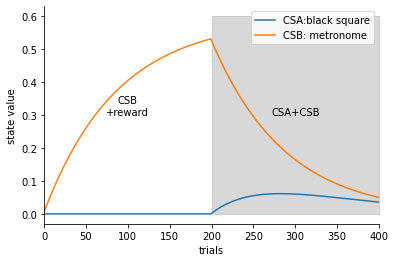

In [69]:
plt.plot(V_history, label=state_names)
plt.fill_between([N_trials, 2*N_trials], 0, 0.6, color='gray',alpha=0.3)
plt.xlim(0, 2 * N_trials)
plt.text(0.5 * N_trials, 0.3, 'CSB\n+reward', ha='center')
plt.text(1.5 * N_trials, 0.3, 'CSA+CSB', ha='center')
plt.ylabel('state value')
plt.xlabel('trials')
plt.legend()
sns.despine()

## Blocking

blocking is the effect that if we already learned to associate one conditional stimulus with a certain reward, then a second simultaneous stimulus will not become associated: the learning is blocked.

In [152]:
state_names = ['CSA', 'CSB']

N_states = len(state_names)
representation_size = N_states

In [153]:
def create_training_trial_CSA():
    state_representation_sequence = np.zeros((100, representation_size))
    reward_sequence = np.zeros(100)
    state_representation_sequence[25:50, 0] = 1
    
    reward_sequence[50] = 1
    
    return state_representation_sequence, reward_sequence

def create_training_trial_CSB():
    state_representation_sequence = np.zeros((100, representation_size))
    reward_sequence = np.zeros(100)
    state_representation_sequence[25:50, 1] = 1
  
    reward_sequence[50] = 1
    
    return state_representation_sequence, reward_sequence

def create_training_trial_CSA_CSB():
    state_representation_sequence = np.zeros((100, representation_size))
    reward_sequence = np.zeros(100)
    state_representation_sequence[25:50, 0] = 1
    state_representation_sequence[25:50, 1] = 1
    
    reward_sequence[50] = 1
    
    return state_representation_sequence, reward_sequence



In [154]:
gamma = 0.95
alpha = 0.001
lambda_ = 0.9

N_trials = 1000

V = np.zeros(representation_size)
V_history = []

### Part 1: conditioning of CSA

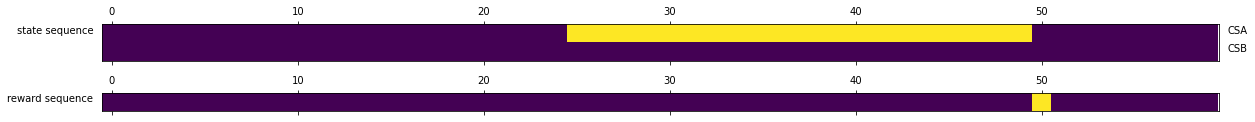

In [155]:
states, rewards = create_training_trial_CSA()

show_trial(states, rewards, state_names)

In [156]:
for trial in range(N_trials):
    last_state = None
    last_reward = None
    z = np.zeros_like(V)  # eligibility trace
    state_values = []
    for state, reward in zip(*create_training_trial_CSA()):
        # update eligibility trace
        z = gamma * lambda_ * z + state
        state_values.append(V @ state)

        if last_state is not None:
            # compute TD error
            delta = reward + gamma * V @ state - V @ last_state
            # update value parameter
            V += alpha * delta * z

        last_state = state
        last_reward = reward
    V_history.append(V.copy())

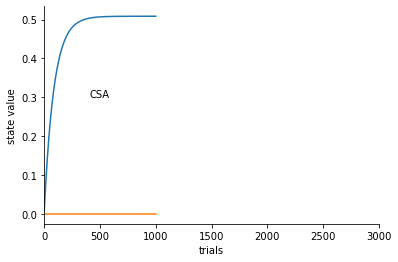

In [157]:
plt.plot(V_history)
plt.ylabel('state value')
plt.text(0.5 * N_trials, 0.3, 'CSA', ha='center')
plt.xlim(0, 3 * N_trials)
plt.xlabel('trials')
sns.despine()

### Step 2: adding second stimulus CSB

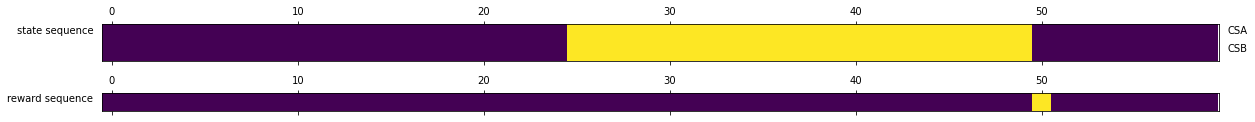

In [158]:
states, rewards = create_training_trial_CSA_CSB()

show_trial(states, rewards, state_names)

In [159]:
for trial in range(N_trials):
    last_state = None
    last_reward = None
    z = np.zeros_like(V)  # eligibility trace
    state_values = []
    for state, reward in zip(*create_training_trial_CSA()):
        # update eligibility trace
        z = gamma * lambda_ * z + state
        state_values.append(V @ state)

        if last_state is not None:
            # compute TD error
            delta = reward + gamma * V @ state - V @ last_state
            # update value parameter
            V += alpha * delta * z

        last_state = state
        last_reward = reward
    V_history.append(V.copy())

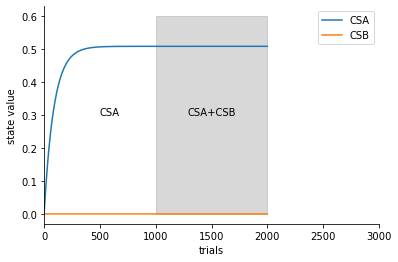

In [160]:
plt.plot(V_history, label=state_names)
plt.fill_between([N_trials, 2 * N_trials], 0, 0.6, color='gray',alpha=0.3)
plt.xlim(0, 3 * N_trials)
plt.text(0.5 * N_trials, 0.3, 'CSA')
plt.text(1.5 * N_trials, 0.3, 'CSA+CSB', ha='center')
plt.ylabel('state value')
plt.xlabel('trials')
plt.legend()
sns.despine()

### Step 3: without CSA blocking of CSB stops

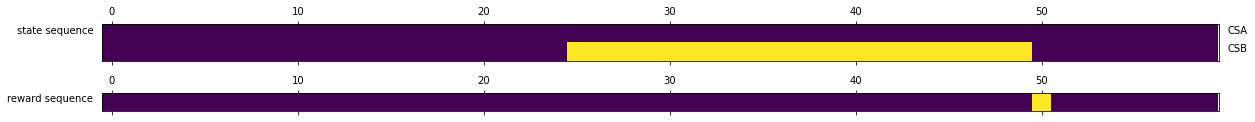

In [161]:
states, rewards = create_training_trial_CSB()

show_trial(states, rewards, state_names)

In [162]:
for trial in range(N_trials):
    last_state = None
    last_reward = None
    z = np.zeros_like(V)  # eligibility trace
    state_values = []
    for state, reward in zip(*create_training_trial_CSB()):
        # update eligibility trace
        z = gamma * lambda_ * z + state
        state_values.append(V @ state)

        if last_state is not None:
            # compute TD error
            delta = reward + gamma * V @ state - V @ last_state
            # update value parameter
            V += alpha * delta * z

        last_state = state
        last_reward = reward
    V_history.append(V.copy())

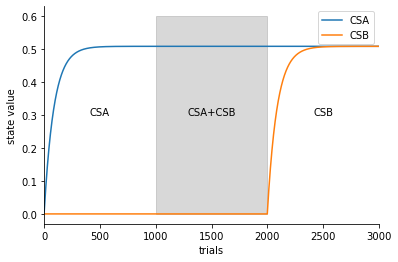

In [163]:
plt.plot(V_history, label=state_names)
plt.fill_between([N_trials, 2*N_trials], 0, 0.6, color='gray',alpha=0.3)
plt.xlim(0, 3 * N_trials)
plt.text(0.5 * N_trials, 0.3, 'CSA',ha='center')
plt.text(1.5 * N_trials, 0.3, 'CSA+CSB', ha='center')
plt.text(2.5 * N_trials, 0.3, 'CSB', ha='center')
plt.ylabel('state value')
plt.xlabel('trials')
plt.legend()
sns.despine()